# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [2]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import torch 
import matplotlib.pyplot as plt 
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [3]:
env = UnityEnvironment(file_name='./Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

In [6]:
# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

Number of agents: 1


In [7]:
# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

Size of each action: 4


In [8]:
# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [9]:
states[0].shape

(33,)

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [10]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)

# size of each action 
action_size = brain.vector_action_space_size

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]

In [11]:
num_agents

1

In [12]:
# agent
from ddpg_agent import Agent

agents = []
for i in range(num_agents):
    agents.append(Agent(state_size=state_size, action_size=action_size, random_seed=i))
# agent = Agent(state_size=state_size, action_size=action_size, random_seed=2)
    

def ddpg(num_episodes=3000, max_T=800, print_every = 100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    flag = 0
    for i_episode in range(num_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        for i in range(num_agents):
            agents[i].reset()

        score = np.zeros((num_agents,)) 
        for t in range(max_T+1):
            actions=[]
            for agent_num in range(num_agents):
                actions.append(agents[agent_num].act(states[agent_num]))
            env_info = env.step(np.array(actions))[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            for agent_num in range(num_agents):
                agents[agent_num].step(states[agent_num], actions[agent_num], rewards[agent_num], next_states[agent_num], dones[agent_num])
                score[agent_num] += rewards[agent_num] 
            states = next_states 
            if np.any(dones):
                break
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {} \t Average Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end='')
        
        if i_episode % print_every == 0:
            print('\rEpisode {} \t Average Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
        if np.mean(scores_deque)>=30.0 and not flag:
            print('The task has been learned in {} episodes'.format(i_episode))
            flag=1
            
    for agent_num in range(num_agents):
        torch.save(agents[agent_num].actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agents[agent_num].critic_local.state_dict(), 'checkpoint_critic.pth')

    return scores
        
scores = ddpg()    

c:\users\bsankaranarayanan2\pycharmprojects\udacity_drl_nd\venv\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 0 	 Average Score: 0.68
Episode 100 	 Average Score: 1.06
Episode 200 	 Average Score: 2.65
Episode 300 	 Average Score: 5.56
Episode 400 	 Average Score: 8.16
Episode 500 	 Average Score: 11.57
Episode 600 	 Average Score: 16.79
Episode 700 	 Average Score: 19.73
Episode 800 	 Average Score: 19.99
Episode 900 	 Average Score: 20.36
Episode 1000 	 Average Score: 22.85
Episode 1100 	 Average Score: 23.09
Episode 1200 	 Average Score: 21.01
Episode 1300 	 Average Score: 23.44
Episode 1400 	 Average Score: 25.06
Episode 1500 	 Average Score: 26.01
Episode 1600 	 Average Score: 27.20
Episode 1700 	 Average Score: 27.38
Episode 1800 	 Average Score: 26.63
Episode 1900 	 Average Score: 28.25
Episode 2000 	 Average Score: 29.41
Episode 2100 	 Average Score: 19.59
Episode 2200 	 Average Score: 20.70
Episode 2300 	 Average Score: 26.41
Episode 2365 	 Average Score: 30.01The task has been learned in 2365 episodes
Episode 2400 	 Average Score: 29.86
Episode 2500 	 Average Score: 29.54
Epi

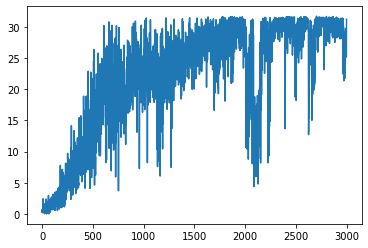

In [13]:
plt.plot(scores)

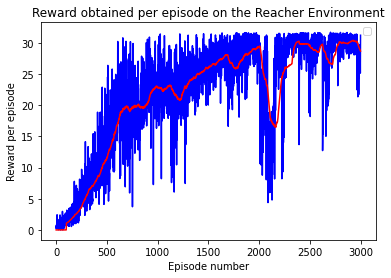

In [30]:
running_window_length = 100
running_avg = np.zeros((len(scores), ))
for i in range(running_window_length, len(scores)):
    running_avg[i] = np.mean(scores[i-100:i])
plt.plot(scores, 'b')
plt.plot(running_avg, 'r')
plt.title('Reward obtained per episode on the Reacher Environment')
plt.xlabel('Episode number')
plt.ylabel('Reward per episode')